In [26]:
import os
import pandas as pd
import sys 
sys.path.append('/home/zhouzikai/nn_ext_dataflows/data_analysis')
from scripts import build_dataframe
import re



def parse_filename(filename):
    pattern = r"([a-z]{2})_([0-9a-zA-Z]+)_baseline_(\d+)_hw_(\d+)_f_(\d+)_nf_(\d+)_s_(\d+)_(\w+)CPU__stats"
    match = re.match(pattern, filename)

    if match:
        num_bits = match.group(2)
        if num_bits == 'bin':
            num_bits = 1
        elif num_bits == '8bt':
            num_bits = 8
        else:
            raise Exception("number of bits not hardcoded")
            num_bits = int(num_bits)

        return {
            'anchoring_stationary': match.group(1),
            'num_bits': num_bits,
            'vector_length': int(match.group(3)),
            'input_hw': int(match.group(4)),
            'filter_size': int(match.group(5)),
            'num_filters': int(match.group(6)),
            'stride': int(match.group(7)),
            'cpu_type': match.group(8),
        }
    else:
        print(f"unmatched. filename: {filename}")
        return {}
def get_file_size(file_path):
    return os.path.getsize(file_path)

directory = '/home/zhouzikai/nn_ext_dataflows/baselines/log_O3'


def get_data_size_df(directory):
    file_data = []
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        parsed_info = parse_filename(filename)
        # if (get_file_size(f)) == 0:
        #     # print("found one empty")
        file_data.append({'file_path': f, 'size': get_file_size(f), **parsed_info})
    df = pd.DataFrame(file_data).set_index('file_path')
    return df

def append_dataframe(df1, df2, join_keyword='filename'):
    '''
    add the 'size' column from df1 to df2, assuming their indices are the same (file path)
    '''
    #merged_df = df2.merge(df1[[join_keyword, 'size']], on=join_keyword, how='left')
    merged_df = df2.join(df1)

    return merged_df

df = get_data_size_df(directory)
empty_files_df = df[df['size'] == 0]
print("empty stats:", empty_files_df)
print("all df:", df)
file_list=[]
for filename in os.listdir(directory):
   f = os.path.join(directory, filename)
   file_list.append(f)
# testing appending dataframe
# first off calling Zack's df function 
df_files = build_dataframe(file_list)
# print(df_files)
df_bl= append_dataframe(df,df_files)
# print(merged)


empty stats:                                                     size anchoring_stationary   
file_path                                                                       
/home/zhouzikai/nn_ext_dataflows/baselines/log_...     0                   os  \
/home/zhouzikai/nn_ext_dataflows/baselines/log_...     0                   is   
/home/zhouzikai/nn_ext_dataflows/baselines/log_...     0                   ws   
/home/zhouzikai/nn_ext_dataflows/baselines/log_...     0                   ws   
/home/zhouzikai/nn_ext_dataflows/baselines/log_...     0                   os   
...                                                  ...                  ...   
/home/zhouzikai/nn_ext_dataflows/baselines/log_...     0                   os   
/home/zhouzikai/nn_ext_dataflows/baselines/log_...     0                   os   
/home/zhouzikai/nn_ext_dataflows/baselines/log_...     0                   ws   
/home/zhouzikai/nn_ext_dataflows/baselines/log_...     0                   ws   
/home/zhouzikai

In [27]:
import os
import pandas as pd
import sys 
sys.path.append('/home/zhouzikai/nn_ext_dataflows/data_analysis')
from scripts import build_dataframe
import re



def parse_filename(filename):
    pattern = r"vl(\d+)_([0-9a-zA-Z]+)_stride_(\d+)_fs_(\d+)_([a-z]{2})((?:_[a-zA-Z]+_\d+)+)_hw_(\d+)_nf_(\d+)_(\w+)CPU__stats\.txt"
    match = re.match(pattern, filename)

    if match:
        num_bits = match.group(2)
        if num_bits == 'bin':
            num_bits = 1
        elif num_bits == '8bt':
            num_bits = 8
        else:
            raise Exception("number of bits not hardcoded")
            num_bits = int(num_bits)

        # Parsing and sorting auxiliary stationary and stats pairs
        aux_pairs_str = match.group(6)
        aux_pairs = re.findall(r"_([a-zA-Z]+)_(\d+)", aux_pairs_str)
        sorted_aux_pairs = sorted(aux_pairs, key=lambda x: x[0])

        aux_data = {}
        for i, (name, value) in enumerate(sorted_aux_pairs):
            if name not in aux_data:
                aux_data[f'aux_{name}'] = int(value)
            else:
                aux_data[f'aux_{name}_{i + 1}'] = int(value)

        return {
            'vector_length': int(match.group(1)),
            'num_bits': num_bits,
            'stride': int(match.group(3)),
            'filter_size': int(match.group(4)),
            'anchoring_stationary': match.group(5),
            'input_hw': int(match.group(7)),
            'num_filters': int(match.group(8)),
            'cpu_type': match.group(9),
            **aux_data
        }
    else:
        print(f"unmatched. filename: {filename}")
        return {}


def get_file_size(file_path):
    return os.path.getsize(file_path)

directory = '/home/zhouzikai/nn_ext_dataflows/gen_programs/noblock/log'


def get_data_size_df(directory):
    file_data = []
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        parsed_info = parse_filename(filename)
        # if (get_file_size(f)) == 0:
        #     # print("found one empty")
        file_data.append({'file_path': f, 'size': get_file_size(f), **parsed_info})
    df = pd.DataFrame(file_data).set_index('file_path')
    return df

def append_dataframe(df1, df2, join_keyword='filename'):
    '''
    add the 'size' column from df1 to df2, assuming their indices are the same (file path)
    '''
    #merged_df = df2.merge(df1[[join_keyword, 'size']], on=join_keyword, how='left')
    merged_df = df2.join(df1)

    return merged_df

df = get_data_size_df(directory)
empty_files_df = df[df['size'] == 0]
print("empty stats:", empty_files_df)
print("all df:", df)
file_list=[]
for filename in os.listdir(directory):
   f = os.path.join(directory, filename)
   file_list.append(f)
# testing appending dataframe
# first off calling Zack's df function 
df_files = build_dataframe(file_list)
# print(df_files)
df_O3 = append_dataframe(df,df_files)
# print(merged)

empty stats: Empty DataFrame
Columns: [size, vector_length, num_bits, stride, filter_size, anchoring_stationary, input_hw, num_filters, cpu_type, aux_os, aux_ws, aux_is]
Index: []
all df:                                                       size  vector_length   
file_path                                                                   
/home/zhouzikai/nn_ext_dataflows/gen_programs/n...  167684            128  \
/home/zhouzikai/nn_ext_dataflows/gen_programs/n...  167406            512   
/home/zhouzikai/nn_ext_dataflows/gen_programs/n...  167783            256   
/home/zhouzikai/nn_ext_dataflows/gen_programs/n...  327653            512   
/home/zhouzikai/nn_ext_dataflows/gen_programs/n...  322773            256   
...                                                    ...            ...   
/home/zhouzikai/nn_ext_dataflows/gen_programs/n...  331069            128   
/home/zhouzikai/nn_ext_dataflows/gen_programs/n...  169974            128   
/home/zhouzikai/nn_ext_dataflows/gen_progr

In [29]:
df_bl = df_bl[["simSeconds","simInsts","simOps","vector_length","num_bits","stride","filter_size","anchoring_stationary","input_hw","num_filters"]]
df_bl

,simSeconds,simInsts,simOps,vector_length,num_bits,stride,filter_size,anchoring_stationary,input_hw,num_filters
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/is_bin_baseline_256_hw_112_f_5_nf_1_s_2_O3CPU__stats.txt,0.002029,8547403.0,9469230.0,256,1,2,5,is,112,1
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/is_8bt_baseline_512_hw_112_f_5_nf_2_s_2_O3CPU__stats.txt,0.004650,17994310.0,21525325.0,512,8,2,5,is,112,2
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/is_bin_baseline_512_hw_56_f_3_nf_4_s_1_O3CPU__stats.txt,0.001428,5538106.0,6434881.0,512,1,1,3,is,56,4
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/ws_8bt_baseline_256_hw_112_f_4_nf_2_s_2_O3CPU__stats.txt,0.002131,3941444.0,4425947.0,256,8,2,4,ws,112,2
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/ws_8bt_baseline_128_hw_112_f_3_nf_4_s_2_O3CPU__stats.txt,0.000651,3673830.0,3943003.0,128,8,2,3,ws,112,4
...,...,...,...,...,...,...,...,...,...,...
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/ws_8bt_baseline_256_hw_112_f_3_nf_2_s_2_O3CPU__stats.txt,0.001135,2898768.0,3284908.0,256,8,2,3,ws,112,2
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/ws_8bt_baseline_128_hw_56_f_5_nf_1_s_2_O3CPU__stats.txt,0.000083,2050626.0,2319777.0,128,8,2,5,ws,56,1
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/ws_bin_baseline_512_hw_56_f_5_nf_2_s_1_O3CPU__stats.txt,NaN,NaN,NaN,512,1,1,5,ws,56,2
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/ws_8bt_baseline_128_hw_56_f_3_nf_4_s_1_O3CPU__stats.txt,0.000359,3744534.0,4013685.0,128,8,1,3,ws,56,4


In [37]:
df_bl = df_bl[df_bl["stride"]==1]
df_bl

,simSeconds,simInsts,simOps,vector_length,num_bits,stride,filter_size,anchoring_stationary,input_hw,num_filters
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/is_bin_baseline_512_hw_56_f_3_nf_4_s_1_O3CPU__stats.txt,0.001428,5538106.0,6434881.0,512,1,1,3,is,56,4
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/ws_8bt_baseline_512_hw_112_f_5_nf_4_s_1_O3CPU__stats.txt,0.044780,40844943.0,47842612.0,512,8,1,5,ws,112,4
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/os_8bt_baseline_128_hw_56_f_4_nf_1_s_1_O3CPU__stats.txt,0.000207,2809996.0,3079710.0,128,8,1,4,os,56,1
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/ws_bin_baseline_256_hw_112_f_4_nf_4_s_1_O3CPU__stats.txt,0.020381,22894809.0,24857305.0,256,1,1,4,ws,112,4
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/ws_bin_baseline_128_hw_112_f_5_nf_2_s_1_O3CPU__stats.txt,0.010691,15174789.0,15444354.0,128,1,1,5,ws,112,2
...,...,...,...,...,...,...,...,...,...,...
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/ws_8bt_baseline_256_hw_112_f_5_nf_4_s_1_O3CPU__stats.txt,0.030264,30056631.0,33017196.0,256,8,1,5,ws,112,4
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/is_8bt_baseline_128_hw_56_f_3_nf_2_s_1_O3CPU__stats.txt,0.000175,2557669.0,2827219.0,128,8,1,3,is,56,2
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/ws_bin_baseline_512_hw_56_f_5_nf_2_s_1_O3CPU__stats.txt,NaN,NaN,NaN,512,1,1,5,ws,56,2
/home/zhouzikai/nn_ext_dataflows/baselines/log_O3/ws_8bt_baseline_128_hw_56_f_3_nf_4_s_1_O3CPU__stats.txt,0.000359,3744534.0,4013685.0,128,8,1,3,ws,56,4


In [31]:
df_O3 = df_O3[["simSeconds","simInsts","simOps","vector_length","num_bits","stride","filter_size","anchoring_stationary","input_hw","num_filters"]]

In [38]:
df_O3.groupby(['vector_length', 'num_bits','stride','filter_size','input_hw','num_filters',"anchoring_stationary"]).min()

simSeconds_opt   
vector_length num_bits stride filter_size input_hw num_filters anchoring_stationary                   
128           1        1      3           56       1           is                          0.000088  \
                                                               os                          0.000070   
                                                               ws                          0.000054   
                                                   2           is                          0.000106   
                                                               os                          0.000090   
...                                                                                             ...   
512           8        1      5           112      2           os                          0.003026   
                                                               ws                          0.000679   
                                                   4           is                          0.005046   
                                                               os                          0.006991   
                                                               ws                          0.017398   

                                                                                     simInsts_opt   
vector_length num_bits stride filter_size input_hw num_filters anchoring_stationary                 
128           1        1      3           56       1           is                       1775356.0  \
                                                               os                       1832004.0   
                                                               ws                       1772460.0   
                                                   2           is                       1884023.0   
                                                               os                       2006379.0   
...                                                                                           ...   
512           8        1      5           112      2           os                      10377039.0   
                                                               ws                       6240204.0   
                                                   4           is                      18883860.0   
                                                               os                      19096369.0   
                                                               ws                      10822628.0   

                                                                                     simOps_opt  
vector_length num_bits stride filter_size input_hw num_filters anchoring_stationary              
128           1        1      3           56       1           is                     2046179.0  
                                                               os                     2101109.0  
                                                               ws                     2041586.0  
                                                   2           is                     2154854.0  
                                                               os                     2275492.0  
...                                                                                         ...  
512           8        1      5           112      2           os                    17930035.0  
                                                               ws                     6509376.0  
                                                   4           is                    25972476.0  
                                                               os                    33933245.0  
                                                               ws                    11091840.0  

[324 rows x 3 columns]

In [35]:
df_O3 = df_O3.rename(columns={"simSeconds":"simSeconds_opt","simInsts":"simInsts_opt","simOps":"simOps_opt"})

In [43]:
df_both = pd.merge(df_O3,df_bl,how='left', left_on=['vector_length', 'num_bits','stride','filter_size','input_hw','num_filters',"anchoring_stationary"], right_on = ['vector_length', 'num_bits','stride','filter_size','input_hw','num_filters',"anchoring_stationary"])
df_both

,simSeconds_opt,simInsts_opt,simOps_opt,vector_length,num_bits,stride,filter_size,anchoring_stationary,input_hw,num_filters,simSeconds,simInsts,simOps
0,0.000675,3214020.0,3522539.0,128,1,1,5,is,112,2,0.002033,12248901.0,12518462.0
1,0.000182,1971181.0,2263308.0,512,8,1,3,is,56,1,0.000330,2459999.0,2886338.0
2,0.002018,6168633.0,6473748.0,256,1,1,4,is,112,4,0.005365,19877458.0,21853006.0
3,0.000272,2362952.0,2938648.0,512,8,1,3,os,56,2,0.000479,3754840.0,4588465.0
4,0.000457,3375877.0,3926935.0,256,1,1,3,ws,56,4,0.000646,4709107.0,5220944.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0.000213,2908714.0,3177862.0,128,1,1,3,ws,112,2,0.002876,6359400.0,6628965.0
572,0.000308,2100528.0,2371373.0,128,1,1,3,is,112,1,0.000543,3793390.0,4062962.0
573,0.000863,2996336.0,3265483.0,256,8,1,4,ws,112,1,0.003455,6124104.0,6816509.0
574,0.000311,2688404.0,2957676.0,256,1,1,5,ws,56,2,NaN,NaN,NaN


<Axes: xlabel='simSeconds'>

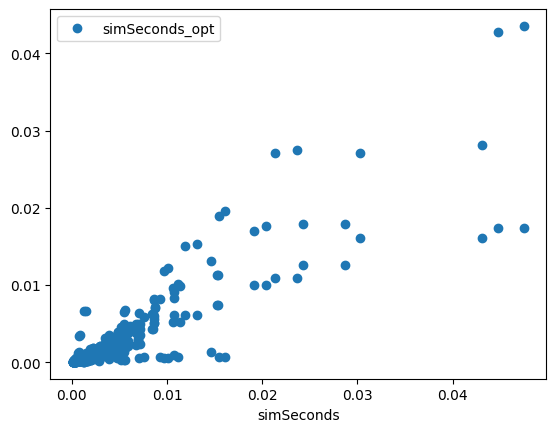

In [46]:
df_both.plot(x="simSeconds",y="simSeconds_opt",style=['o','rx'])

In [49]:
df_both["improvement"] = df_both["simSeconds"]/df_both["simSeconds_opt"]

<Axes: >

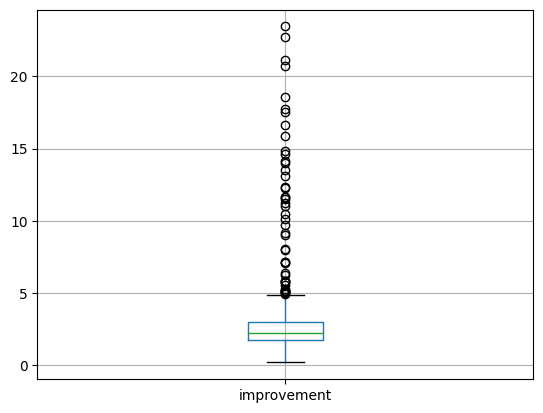

In [50]:
df_both.boxplot(column="improvement")